### 1. K-Means

In [1]:
library(caret)
data(iris)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [15]:
# 데이터셋 분할
# createDataPartition : caret패키지의 데이터셋을 분리해주는 함수
samp <- createDataPartition(y=iris$Species, p=0.7, list=F)
data.train <- iris[samp,]
data.test <- iris[-samp,]
summary(data.train) 

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.000   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.30   versicolor:35  
 Median :5.700   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.862   Mean   :3.073   Mean   :3.774   Mean   :1.21                  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.700   Max.   :2.50                  

In [16]:
# 품종컬럼을 제외한 4개의 컬럼을 표준화
training.data <- scale(data.train[-5])
summary(training.data)

  Sepal.Length      Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.8275   Min.   :-1.9853   Min.   :-1.5488   Min.   :-1.4425  
 1st Qu.:-0.8915   1st Qu.:-0.6214   1st Qu.:-1.2696   1st Qu.:-1.1825  
 Median :-0.1894   Median :-0.1667   Median : 0.2935   Median : 0.1176  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.7466   3rd Qu.: 0.5153   3rd Qu.: 0.7401   3rd Qu.: 0.7677  
 Max.   : 2.3847   Max.   : 3.0158   Max.   : 1.6333   Max.   : 1.6777  

In [8]:
# kmeans모델생성
# kmeans(데이터, centers=중심좌표갯수, iter.max=군집화작업의 횟수)
model <- kmeans(training.data[,-5], centers = 3, iter.max = 10000) 
model
names(model)
model$centers

K-means clustering with 3 clusters of sizes 41, 29, 35

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1    0.0328078  -0.8222545    0.3979014   0.3231413
2    1.1849912   0.2534189    1.0059916   1.0545786
3   -1.0202819   0.7532368   -1.2996490  -1.2523307

Clustering vector:
  2   5   7   9  10  11  12  13  14  15  18  20  21  22  24  25  26  27  28  30 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 31  32  33  34  36  37  38  39  41  42  43  44  46  47  49  51  52  53  55  56 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   2   2   2   1   1 
 57  58  59  60  61  62  63  64  66  67  69  74  75  76  79  81  82  83  84  85 
  2   1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1 
 86  87  89  90  91  96  97  98  99 100 101 102 105 108 109 110 111 112 113 114 
  2   2   1   1   1   1   1   1   1   1   2   1   2   2   1   2   2   1   2   1 
116 118 119 122 123 125 126 127 128 129 131 132 134 1

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.0328078,-0.8222545,0.3979014,0.3231413
1.1849912,0.2534189,1.0059916,1.0545786
-1.0202819,0.7532368,-1.2996490,-1.2523307


In [10]:
# 모델에서 분류한 군집번호
model$cluster 
model$cluster <- as.factor(model$cluster)
model$cluster 

2   5   7   9  10  11  12  13  14  15  18  20  21  22  24  25  26  27  28  30 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 31  32  33  34  36  37  38  39  41  42  43  44  46  47  49  51  52  53  55  56 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   2   2   2   1   1 
 57  58  59  60  61  62  63  64  66  67  69  74  75  76  79  81  82  83  84  85 
  2   1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1 
 86  87  89  90  91  96  97  98  99 100 101 102 105 108 109 110 111 112 113 114 
  2   2   1   1   1   1   1   1   1   1   2   1   2   2   1   2   2   1   2   1 
116 118 119 122 123 125 126 127 128 129 131 132 134 135 136 137 139 140 141 143 
  2   2   2   1   2   2   2   1   1   2   2   2   1   1   2   2   1   2   2   1 
145 146 147 149 150 
  2   2   1   2   1

2   5   7   9  10  11  12  13  14  15  18  20  21  22  24  25  26  27  28  30 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 31  32  33  34  36  37  38  39  41  42  43  44  46  47  49  51  52  53  55  56 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   2   2   2   1   1 
 57  58  59  60  61  62  63  64  66  67  69  74  75  76  79  81  82  83  84  85 
  2   1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1 
 86  87  89  90  91  96  97  98  99 100 101 102 105 108 109 110 111 112 113 114 
  2   2   1   1   1   1   1   1   1   1   2   1   2   2   1   2   2   1   2   1 
116 118 119 122 123 125 126 127 128 129 131 132 134 135 136 137 139 140 141 143 
  2   2   2   1   2   2   2   1   1   2   2   2   1   1   2   2   1   2   2   1 
145 146 147 149 150 
  2   2   1   2   1 
Levels: 1 2 3

In [26]:
data.train$cluster <- as.factor(model$cluster)
tail(data.train, 15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
131,7.4,2.8,6.1,1.9,virginica,2
132,7.9,3.8,6.4,2.0,virginica,2
133,6.4,2.8,5.6,2.2,virginica,1
134,6.3,2.8,5.1,1.5,virginica,1
136,7.7,3.0,6.1,2.3,virginica,2
138,6.4,3.1,5.5,1.8,virginica,2
139,6.0,3.0,4.8,1.8,virginica,1
140,6.9,3.1,5.4,2.1,virginica,2
142,6.9,3.1,5.1,2.3,virginica,2
143,5.8,2.7,5.1,1.9,virginica,1


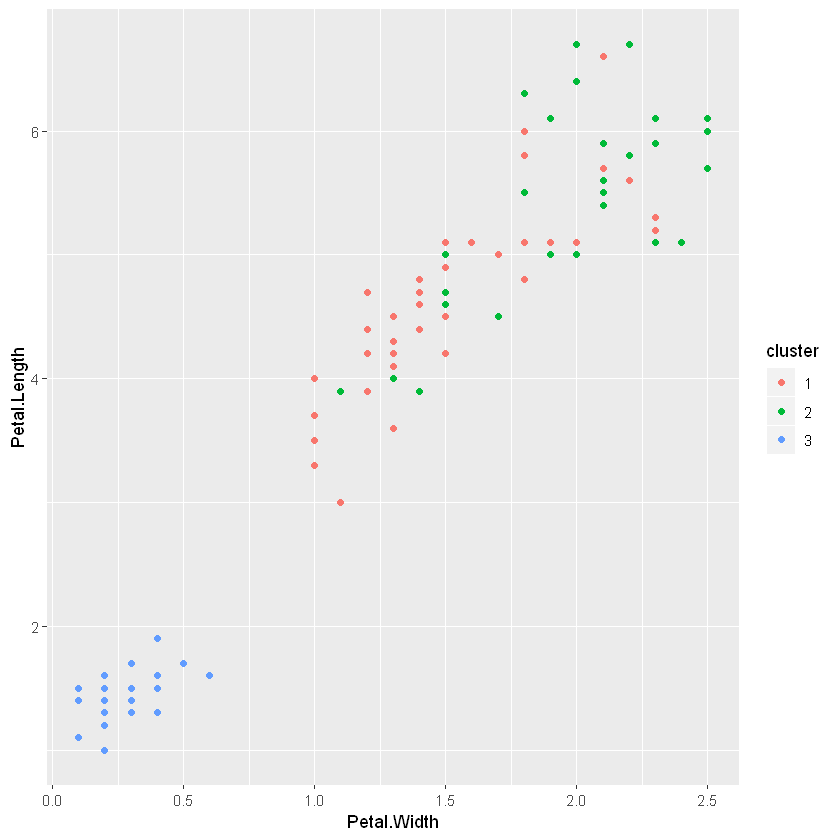

In [23]:
# 예측결과 시각화
qplot(Petal.Width, Petal.Length, color=cluster, data=data.train)

In [33]:
# 학습용데이터로 측정한 정학도
data.train$Species
data.train$cluster

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     versicolor
 [37] versicolor versicolor versicolor versicolor versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor virginica  virginica 
 [73] virginica  virginica  virginica  virginica  virginica  virginica 
 [79] virginica  virginica  virginica  virginica  virginica  virginica 
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  virginica  virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  virginica  virginica  virginica 
[103] virginica  virginica  virginica 
Levels: setosa versicolor virginica

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2
 [38] 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2
 [75] 1 2 2 1 2 1 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2 2 1 2 2 1 2 2 1 2 1
Levels: 1 2 3

In [49]:
# 분류된 군집번호를 품종으로 변환하는 함수
convert <- function(i) {
    if(i==1) {
        return('virsicolor')
    } else if(i==2) {
        return('virginica') 
    } else if(i==3) {
        return('setosa')
    }      
}        

In [52]:
# 오류분류표
table(data.train$Species, data.train$cluster)

# 정확도를 계산하기 위해 군집번호(1,2,3)을 품종문자열로 변환
result <- sapply(data.train$cluster, convert)
result

# 정확도
mean(result == data.train$Species)

            
              1  2  3
  setosa      0  0 35
  versicolor 28  7  0
  virginica  13 22  0

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
  [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [16] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [21] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [26] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [31] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [36] "virginica"  "virginica"  "virginica"  "virsicolor" "virsicolor"
 [41] "virginica"  "virsicolor" "virsicolor" "virsicolor" "virsicolor"
 [46] "virsicolor" "virsicolor" "virsicolor" "virginica"  "virsicolor"
 [51] "virsicolor" "virsicolor" "virsicolor" "virsicolor" "virsicolor"
 [56] "virsicolor" "virsicolor" "virsicolor" "virsicolor" "virsicolor"
 [61] "virginica"  "virginica"  "virsicolor" "virsicolor" "virsicolor"
 [66] "virsicolor" "virsicolor" "virsicolor" "virsicolor" "virsicolor"
 [71] "virginica"  "virsicolor" "virginica"  "virginica"  "virsicolor"
 [76] "virginica"  "virginica"  "virsicolor" "virginica"  "virsicolor"
 [81] "virginica"  "virginica"  "virginica"  "virsicolor" "virginica" 
 [86] "virginica"  "virginica"  "virsicolor" "virsicolor" "virginica" 
 [91] "virginica"  "virginica"  "virsicolor" "virsicolor" "virginica" 
 [96] "virginica"  "virsicolor" "virginica"  "virginica"  "virsicolor"
[101] "virginica"  "virginica"  "virsicolor" "virginica"  "virsicolor"

[1] 0.5428571

In [55]:
# 검증용으로 모델을 평가
# matrix -> dataframe으로 변경
class(training.data)
training.data <- as.data.frame(training.data)
class(training.data)

[1] "matrix"

[1] "data.frame"

In [61]:
# k-means학습모델생성
modFit <- train(x=training.data[,-5], y=data.train$cluster, method='knn')
testing.data <- as.data.frame(scale(data.test[-5]))
head(testing.data)

# 검증용 데이터셋으로 검증
testClusterPred <- predict(modFit, testing.data)
testClusterPred

table(data.test$Species, testClusterPred)
result <- sapply(testClusterPred, convert)
mean(result == data.test$Species)

Warning message in load(system.file("models", "models.RData", package = "caret")):
"strings not representable in native encoding will be translated to UTF-8"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
2,-1.1690015,-0.04663676,-1.346963,-1.294140
6,-0.5195562,2.05201756,-1.172787,-1.028827
15,0.0000000,2.28520138,-1.463081,-1.294140
21,-0.5195562,0.88609849,-1.172787,-1.294140
25,-1.2988905,0.88609849,-1.056670,-1.294140
26,-1.0391124,-0.04663676,-1.230846,-1.294140


[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1
[39] 1 2 1 2 2 2 2
Levels: 1 2 3

            testClusterPred
              1  2  3
  setosa      0  0 15
  versicolor 15  0  0
  virginica   6  9  0

[1] 0.5333333

### 2. KNN

In [62]:
library(plyr)
library(ggplot2)
library(class)

In [63]:
# iris 데이터를 Sepal.Length, Sepal.Width, Species로 단순화
iris_data <- iris[, c('Sepal.Length', 'Sepal.Width', 'Species')]
iris_data %>% head()

Sepal.Length,Sepal.Width,Species
5.1,3.5,setosa
4.9,3.0,setosa
4.7,3.2,setosa
4.6,3.1,setosa
5.0,3.6,setosa
5.4,3.9,setosa


In [65]:
set.seed(1234)

# 데이터셋분할
samp <- c(sample(1:50,35), sample(51:100,35), sample(101:150,35))
train_set <- iris_data[samp, -3]
test_set <- iris_data[-samp, -3]
head(train_set)
head(test_set)

# 정답(품종별 라벨링)
train_y = iris_data[samp, 3] # 학습용데이터셋의 정답
test_y = iris_data[-samp, 3] # rjawmd용데이터셋의 정답

# 데이터형확인
class(train_set)
class(test_set)

# 테이터셋의 크기확인 : dim()
dim(train_set)
dim(test_set)

,Sepal.Length,Sepal.Width
28,5.2,3.5
16,5.7,4.4
22,5.1,3.7
37,5.5,3.5
44,5.0,3.5
9,4.4,2.9


,Sepal.Length,Sepal.Width
1,5.1,3.5
7,4.6,3.4
10,4.9,3.1
11,5.4,3.7
13,4.8,3.0
17,5.4,3.9


[1] "data.frame"

[1] "data.frame"

[1] 105   2

[1] 45  2

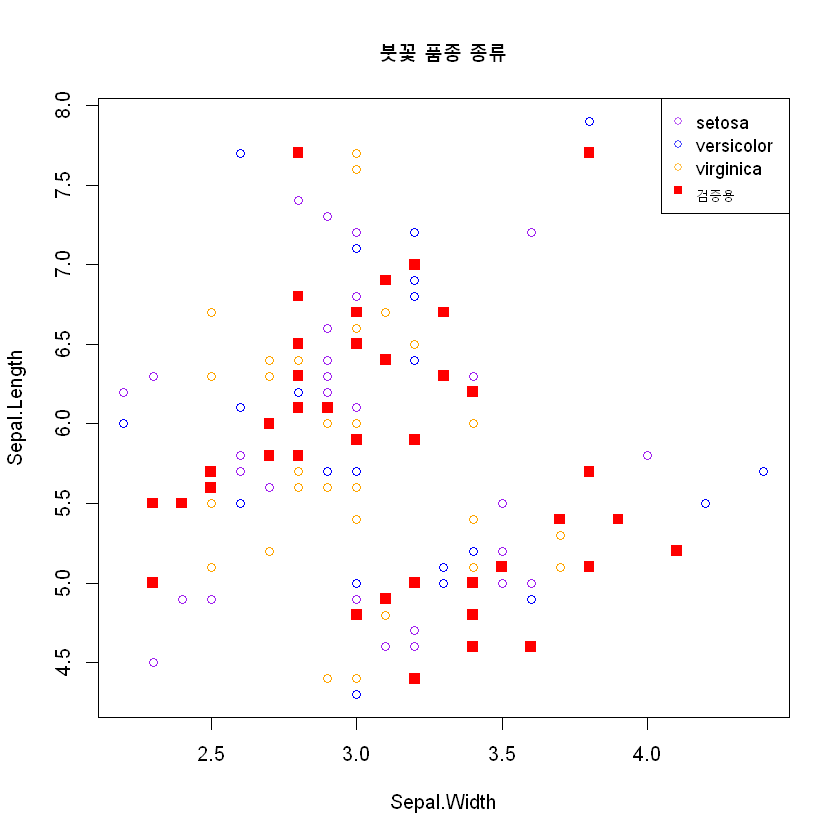

In [70]:
# 데이터시각화 : train_set으로 산점도그리기
plot(Sepal.Length~Sepal.Width, data=train_set, col=c('purple', 'blue', 'orange'),
     main='붓꽃 품종 종류')

# train_set위에 test_set을 그리기
points(formula=Sepal.Length~Sepal.Width, data=test_set, col='red', pch=15, cex=1.2)

# 범례표시
legend("topright", c(levels(iris_data$Species), '검증용'), pch=c(1,1,1,15),
      col=c(alpha(c('purple', 'blue', 'orange'), 0.7), 'red'), cex=0.9)

In [74]:
# 최근접의 이웃의 갯수(k값)를 구하기
# k값을 1~105까지 증가시켜서 최적의 k값을 찾기

accuracy_k <- NULL # 분류정확도를 저장할 벡터 선언
for(i in c(1:nrow(train_set))) {
    set.seed(1234)
    knn_k = knn(train=train_set, test=test_set, cl=train_y, k=i)
    accuracy_k <- c(accuracy_k, mean(test_y == knn_k)) # 정확도를 저장
}
accuracy_k

[1] 0.6888889 0.6888889 0.7555556 0.8000000 0.8222222 0.8222222 0.8444444
  [8] 0.8222222 0.8000000 0.7777778 0.7777778 0.7777778 0.7555556 0.7555556
 [15] 0.7555556 0.7333333 0.7333333 0.7555556 0.7777778 0.7777778 0.8000000
 [22] 0.8000000 0.8000000 0.8000000 0.8000000 0.8000000 0.8000000 0.8000000
 [29] 0.8000000 0.8000000 0.8000000 0.8000000 0.8000000 0.8000000 0.8000000
 [36] 0.8000000 0.8222222 0.8000000 0.8000000 0.7777778 0.7555556 0.7777778
 [43] 0.7777778 0.7777778 0.7777778 0.7777778 0.7555556 0.7555556 0.7333333
 [50] 0.7333333 0.7555556 0.7111111 0.7555556 0.7555556 0.7333333 0.7333333
 [57] 0.7333333 0.7777778 0.7777778 0.7777778 0.7777778 0.7333333 0.7555556
 [64] 0.6888889 0.6888889 0.6888889 0.6888889 0.6888889 0.7333333 0.6666667
 [71] 0.7333333 0.7111111 0.7333333 0.6888889 0.6888889 0.6888889 0.6888889
 [78] 0.6888889 0.7333333 0.6888889 0.6666667 0.7111111 0.7111111 0.6444444
 [85] 0.6444444 0.6666667 0.6666667 0.7111111 0.7111111 0.7333333 0.6888889
 [92] 0.7111111 0.7777778 0.7333333 0.6444444 0.6666667 0.6222222 0.6666667
 [99] 0.5777778 0.5777778 0.5333333 0.5111111 0.5111111 0.5333333 0.3777778

[1] "numeric"

k,accuracy
1,0.6888889
2,0.6888889
3,0.7555556
4,0.8000000
5,0.8222222
6,0.8222222


,k,accuracy
100,100,0.5777778
101,101,0.5333333
102,102,0.5111111
103,103,0.5111111
104,104,0.5333333
105,105,0.3777778


'data.frame':	105 obs. of  2 variables:
 $ k       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ accuracy: num  0.689 0.689 0.756 0.8 0.822 ...


[1] 7

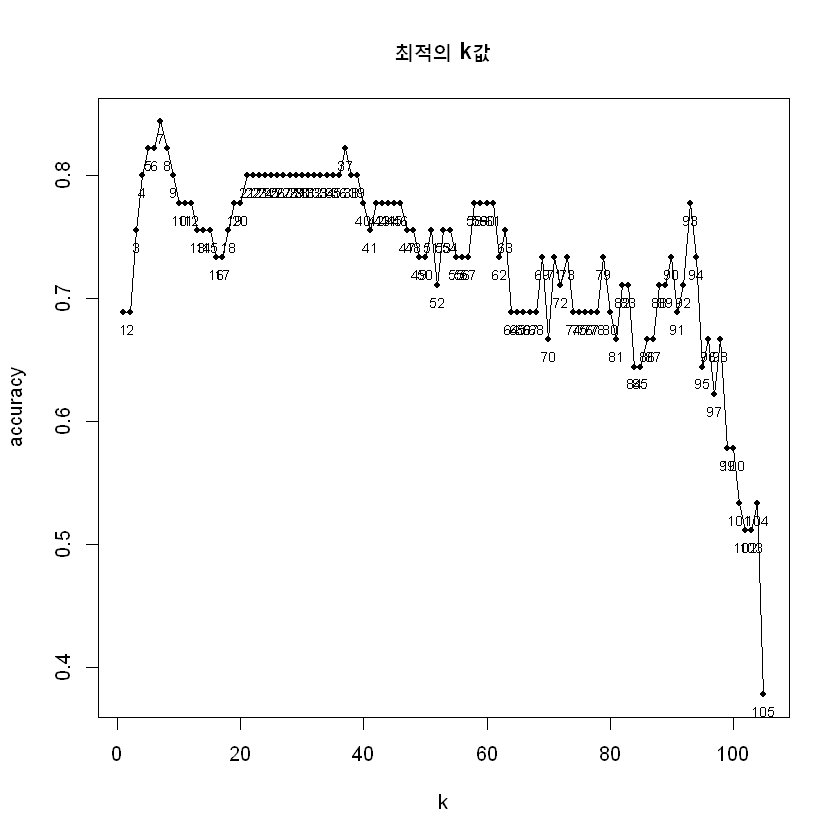

In [82]:
# 최적의 K값의 시각화
# 그래프를 그기기 위헤 데이터프레임으로 변환
class(accuracy_k) # 뉴메릭은 그래프출력불가
df_accuracy <- data.frame(k=c(1:nrow(train_set)), accuracy=accuracy_k)
head(df_accuracy)
tail(df_accuracy)
str(df_accuracy)

# k값에 따른 분류정확도 그래프 그리기
plot(accuracy~k, data=df_accuracy, type='o', pch=20, main='최적의 k값')
# 그래프 텍스트 추가
with(df_accuracy, text(accuracy~k, labels=rownames(df_accuracy), pos=1, cex=0.7))

# 정확도가 가장 높으면서 가장 적은 k값의 갯수는?
min(df_accuracy[df_accuracy$accuracy %in% max(accuracy_k), "k"])

In [ ]:
# 정확도가 가장 높으면서 최소의 k값 = 7
set.seed(1234)
knn <- knn(train = train_set, test=test_set, cl=train_y, k=7)
knn
# 훈련한 결과를 시각화 : 그래프를 그리기 위해 numeric을 df으로 변환
df <- data.frame(test_set, predicted=knn)
df

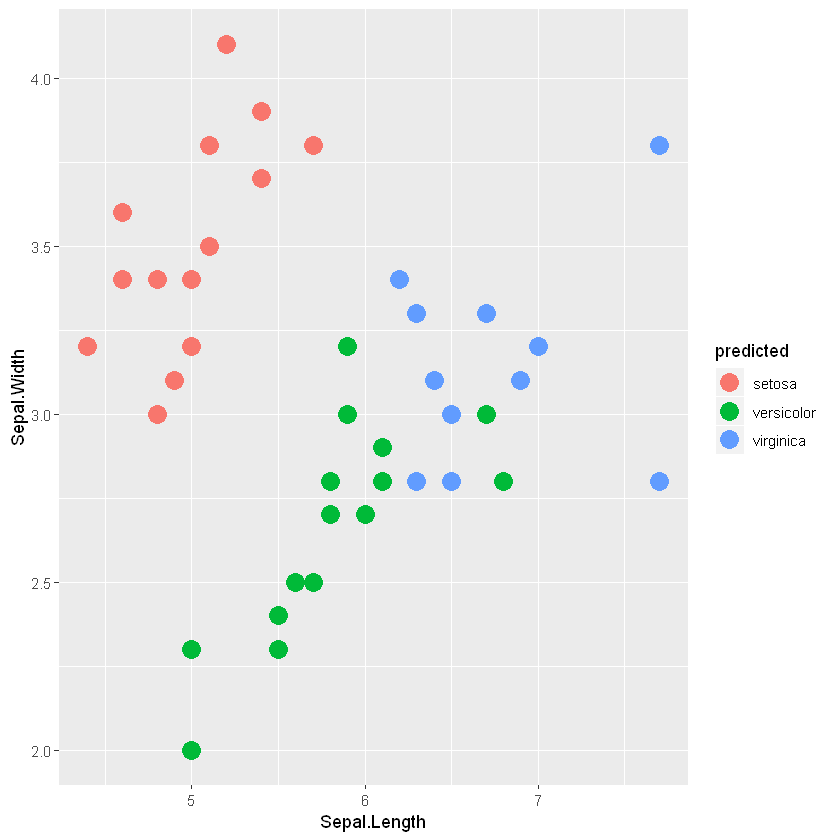

In [86]:
ggplot(df, aes(Sepal.Length, Sepal.Width, color=predicted, fill=predicted)) +
    geom_point(size=5)

In [103]:
# 검증용 데이터셋과 비교
table(test_y, df$predicted)
mean(test_y == df$predicted)

            knn
test_y       setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

[1] 1

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

##### 연습문제 : Petal.Length, Petal.Width
* KNN으로 예측해 보세요!

In [89]:
iris_data <- iris[, c('Petal.Length', 'Petal.Width', 'Species')]

set.seed(1234)

# 데이터셋분할
samp <- c(sample(1:50,35), sample(51:100,35), sample(101:150,35))
train_set <- iris_data[samp, -3]
test_set <- iris_data[-samp, -3]
head(train_set)
head(test_set)

# 정답(품종별 라벨링)
train_y = iris_data[samp, 3] # 학습용데이터셋의 정답
test_y = iris_data[-samp, 3] # rjawmd용데이터셋의 정답

# 데이터형확인
class(train_set)
class(test_set)

# 테이터셋의 크기확인 : dim()
dim(train_set)
dim(test_set)

,Petal.Length,Petal.Width
28,1.5,0.2
16,1.5,0.4
22,1.5,0.4
37,1.3,0.2
44,1.6,0.6
9,1.4,0.2


,Petal.Length,Petal.Width
1,1.4,0.2
7,1.4,0.3
10,1.5,0.1
11,1.5,0.2
13,1.4,0.1
17,1.3,0.4


[1] "data.frame"

[1] "data.frame"

[1] 105   2

[1] 45  2

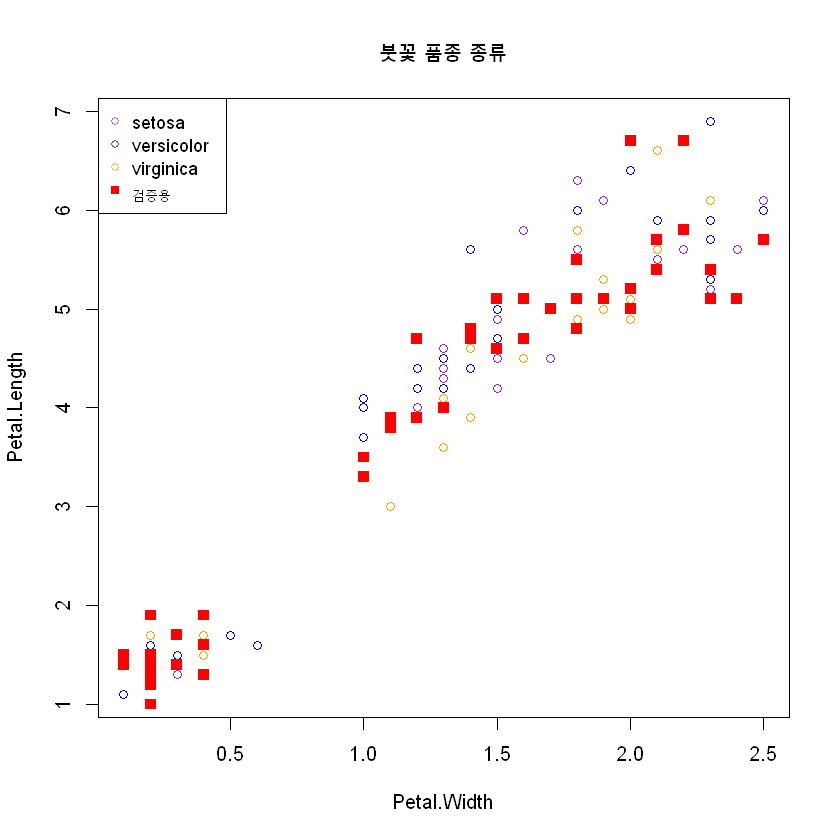

In [91]:
plot(Petal.Length~Petal.Width, data=train_set, col=c('purple', 'blue', 'orange'),
     main='붓꽃 품종 종류')

# train_set위에 test_set을 그리기
points(formula=Petal.Length~Petal.Width, data=test_set, col='red', pch=15, cex=1.2)

# 범례표시
legend("topleft", c(levels(iris_data$Species), '검증용'), pch=c(1,1,1,15),
      col=c(alpha(c('purple', 'blue', 'orange'), 0.7), 'red'), cex=0.9)

[1] "numeric"

'data.frame':	105 obs. of  2 variables:
 $ k       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ accuracy: num  0.933 0.933 0.933 0.933 0.933 ...


[1] 56

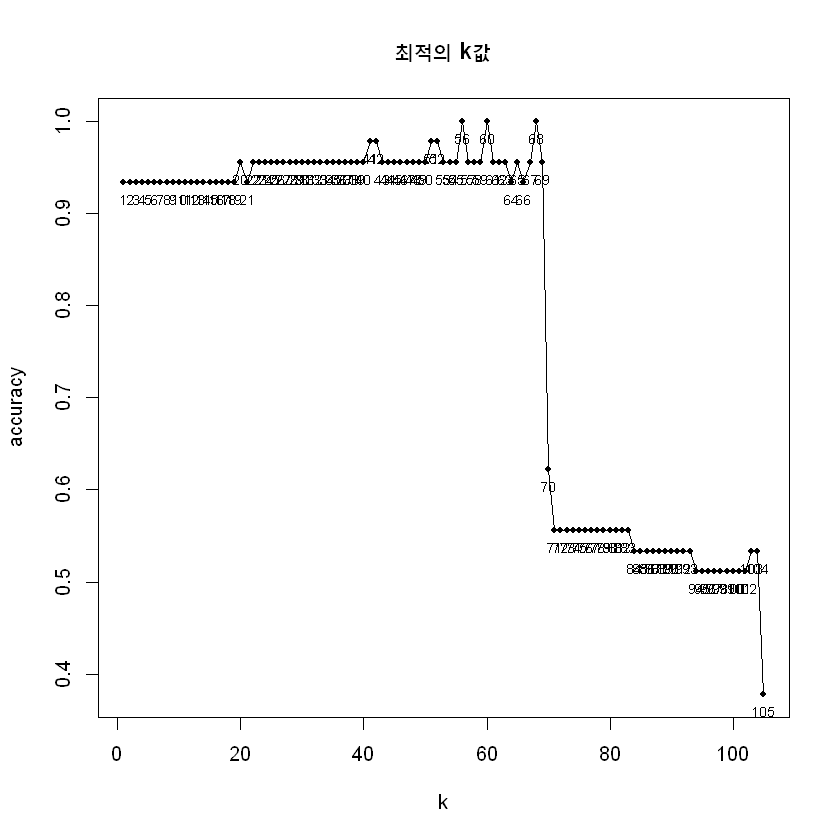

In [92]:
accuracy_k <- NULL
for(i in c(1:nrow(train_set))) {
    set.seed(1234)
    
    # knn(train=학습용, test=검증용, cl=라벨, k=최근접이웃의수)
    knn_k = knn(train=train_set, test=test_set, cl=train_y, k=i)
    
    # 정확도값을 벡터에 추가
    accuracy_k <- c(accuracy_k, mean(test_y == knn_k))
}

# 차트를 그리기 위해 데이터프레임으로 변환
class(accuracy_k) # 뉴메릭은 그래프출력불가
df_accuracy <- data.frame(k=c(1:nrow(train_set)), accuracy=accuracy_k)
str(df_accuracy)

# k에 따른 분류 정확도 그래프 그리기
plot(accuracy~k, data=df_accuracy, type="o", pch=20, main="최적의 k값")

# 그래픙 k 라벨링하기
with(df_accuracy, text(accuracy~k, labels=rownames(df_accuracy), pos=1, cex=0.7))

# 분류 정확도가 가장 높으면서 가장 작은 k값은? 4 
min(df_accuracy[df_accuracy$accuracy %in% max(accuracy_k), "k"])

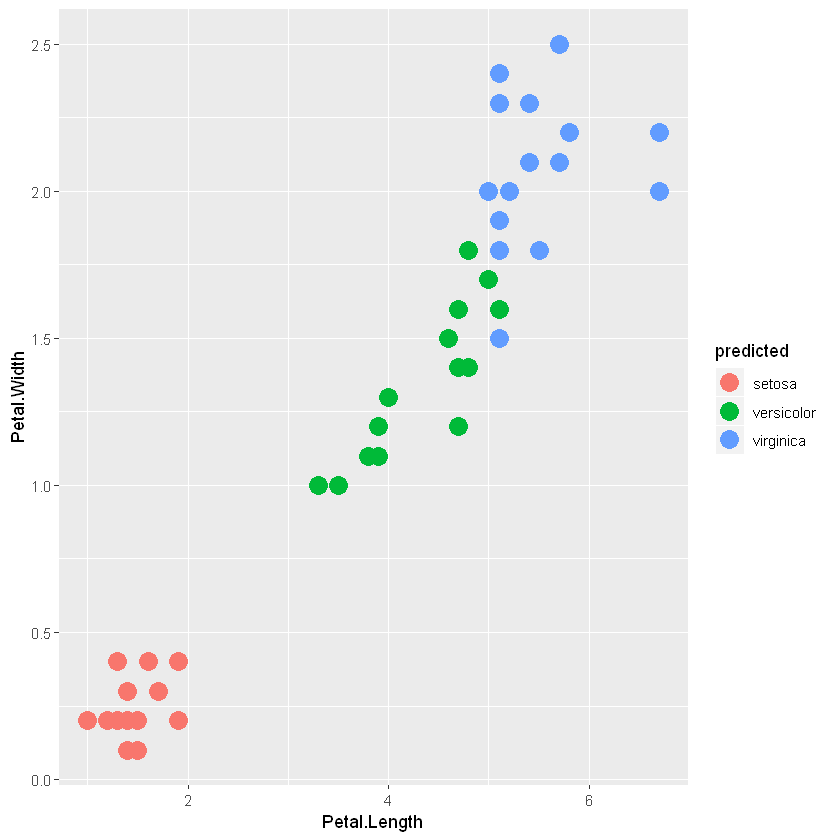

In [94]:
set.seed(1234)
knn = knn(train=train_set, test=test_set, cl=train_y, k=56)
df <- data.frame(test_set, predicted=knn)
ggplot(df, aes(Petal.Length, Petal.Width, color=predicted, fill=predicted)) + geom_point(size=5)

In [100]:
table(test_y, knn)
mean(test_y == knn) # 80%

mean(knn==test_y)

            knn
test_y       setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

[1] 1

[1] 1